In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
from helpers.graph import *
from helpers.geometry import *;
import matplotlib.pyplot as plt

%matplotlib notebook

ModuleNotFoundError: No module named 'helpers'

In [35]:
# use cv2.pyrMeanShiftFiltering if filter = True
# sp – The spatial window radius.
# sr – The color window radius.
def generate_polygon_countour(image, filter=None, sp=None, sr=None):
    if filter:
        image = cv2.pyrMeanShiftFiltering(image, sp, sr)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    _, countours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    approxes = []
    for i, cnt in enumerate(countours):
        episilon = 0.01 * cv2.arcLength(cnt, True)
        approxes.append(cv2.approxPolyDP(cnt, episilon, True))
    return approxes

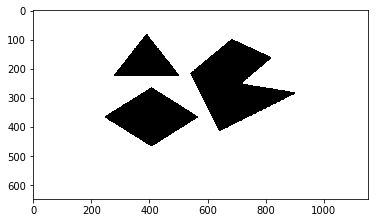

In [31]:
img = cv2.imread("new_paint.png")
plt.imshow(img)

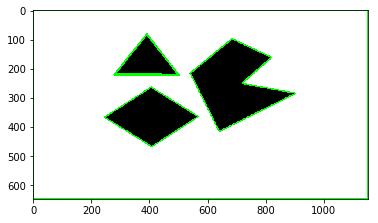

In [36]:
approxes = generate_polygon_countour(img)
for approx in approxes:
    img = cv2.drawContours(img, [approx], 0, (0,255,0), 3)
plt.imshow(img)

In [45]:
polygons = [np.squeeze(x) for x in approxes]
boundary = polygons[0]
obstacles = polygons[1:-1]

In [47]:
boundary

array([[   0,    0],
       [   0,  647],
       [1151,  647],
       [1151,    0]], dtype=int32)

In [50]:
def extract_vertex(_boundary, _obstacles=None):
    boundary = [point(i[0], i[1]) for i in _boundary]
    # Extract obstacles
    
    return boundary

In [51]:
boundary = extract_vertex(boundary)

NameError: name 'point' is not defined